# Selection sort

In [ ]:
def selection_sort(arr):
    """
    Selection Sort implementation in Python.
    
    Time Complexity: O(n²)
    Space Complexity: O(1)
    
    Args:
        arr: List of comparable elements
    
    Returns:
        Sorted list
    """
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    
    return arr


In [1]:
def my_selection_sort(arr:list):
    n = len(arr)
    for i in range(n):
        min_ind = i
        for j in range(i, n):
            if arr[j] < arr[min_ind]:
                min_ind = j
        arr[min_ind], arr[i] = arr[i], arr[min_ind]
    return arr


my_selection_sort([66, 4, 34, 23, 1])


[1, 4, 23, 34, 66]

# Bubble sort

In [4]:
def bubble_sort(arr):
    """
    Сортировка пузырьком (Bubble Sort)
    Сложность: O(n²)
    Память: O(1)
    Стабильная: Да
    In-place: Да
    """
    n = len(arr)
    
    # Проходим по всем элементам n-1 раз
    for i in range(n):
        # Флаг для оптимизации (если нет обменов - массив отсортирован)
        swapped = False
        
        # Последние i элементов уже на своих местах
        for j in range(0, n - i - 1):
            # Если текущий элемент больше следующего - меняем местами
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        
        # Если не было обменов - выходим досрочно
        if not swapped:
            break
    
    return arr


In [6]:
def my_bubble_sort(arr:list):
    n = len(arr)
    for i in range(n):
        swap = False
        for j in range(n - i - 1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swap = True
        if not swap:
            return arr
    return arr

my_bubble_sort(
    [9, 8, 7, 6, 5, 4, 3, 2, 1]
)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

# Quick Sort

In [1]:
def quick_sort(arr):
    """
    Быстрая сортировка (Quick Sort)
    Сложность: O(n log n) в среднем, O(n²) в худшем
    Память: O(log n)
    """
    # Базовый случай: массив из 0 или 1 элемента уже отсортирован
    if len(arr) <= 1:
        return arr
    
    # Выбираем опорный элемент (середина массива)
    pivot = arr[len(arr) // 2]
    
    # Разделяем массив на три части:
    left = [x for x in arr if x < pivot]    # Элементы меньше опорного
    middle = [x for x in arr if x == pivot] # Элементы равные опорному  
    right = [x for x in arr if x > pivot]   # Элементы больше опорного
    
    # Рекурсивно сортируем левую и правую части, объединяем с серединой
    return quick_sort(left) + middle + quick_sort(right)

In [7]:
def my_turn_quick_sort(arr:list):
    if len(arr) <= 1:
        return arr
    pivot_index = len(arr) // 2
    left = [el for el in arr if el < arr[pivot_index]]
    middle = [el for el in arr if el == arr[pivot_index]]
    right = [el for el in arr if el > arr[pivot_index]]
    return my_turn_quick_sort(left) + middle + my_turn_quick_sort(right)

In [8]:
my_turn_quick_sort(
    [2, 34, 1, 23, 232, 3, 223, 232,2, 3, 33, 3332, 3, 32,43]
)

[1, 2, 2, 3, 3, 3, 23, 32, 33, 34, 43, 223, 232, 232, 3332]

# Merge Sort

In [2]:
def merge_sort(arr):
    """
    Сортировка слиянием (Merge Sort)
    Сложность: O(n log n)
    Память: O(n)
    Стабильная: Да
    """
    # Базовый случай
    if len(arr) <= 1:
        return arr
    
    # Разделяем массив пополам
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])   # Рекурсивно сортируем левую половину
    right = merge_sort(arr[mid:])  # Рекурсивно сортируем правую половину
    
    # Сливаем отсортированные половины
    return merge(left, right)

def merge(left, right):
    """Вспомогательная функция для слияния двух отсортированных массивов"""
    result = []
    i = j = 0
    
    # Сравниваем элементы из обоих массивов и добавляем меньший
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j]) 
            j += 1
    
    # Добавляем оставшиеся элементы (если один массив закончился раньше)
    result.extend(left[i:])
    result.extend(right[j:])
    return result


In [12]:
def my_merge_sort(arr:list):
    if len(arr) <= 1:
        return arr
    pivot_index = len(arr) // 2
    left = arr[:pivot_index]
    right = arr[pivot_index:]
    return my_merge(left, right)


def my_merge(
    left:list,
    right:list
):
    result = []
    i, j = 0 , 0
    while i < len(left) and j < len(right):
        if left[i] > right[j]:
            result.append(right[j])
            j += 1
        else:
            result.append(left[i])
            i += 1
    result = result + left[i:] + right[j:]
    return result


my_merge_sort(
    [2, 34, 1, 23, 232, 3, 223, 232,2, 3, 33, 3332, 3, 32,43]
)

[2, 34, 1, 23, 232, 3, 223, 232, 2, 3, 33, 3332, 3, 32, 43]

# Heap sort

In [3]:
def heap_sort(arr):
    """
    Пирамидальная сортировка (Heap Sort)
    Сложность: O(n log n)
    Память: O(1)
    In-place: Да
    """
    n = len(arr)
    
    # Построение max-heap (кучи)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    
    # Извлекаем элементы из кучи один за другим
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Перемещаем текущий корень в конец
        heapify(arr, i, 0)               # Вызываем heapify на уменьшенной куче


def heapify(arr, n, i):
    """Вспомогательная функция для построения кучи"""
    largest = i          # Инициализируем наибольший элемент как корень
    left = 2 * i + 1     # Левый дочерний элемент
    right = 2 * i + 2    # Правый дочерний элемент
    
    # Если левый дочерний элемент больше корня
    if left < n and arr[left] > arr[largest]:
        largest = left
    
    # Если правый дочерний элемент больше текущего наибольшего
    if right < n and arr[right] > arr[largest]:
        largest = right
    
    # Если наибольший элемент не корень
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Меняем местами
        heapify(arr, n, largest)                     # Рекурсивно heapify поддерево

In [ ]:
import heapq

def heap_sort_ds(arr: list):
    heapq.heapify(arr)
    result = []
    while arr:
        result.append(heapq.heappop(arr))
    
    return result

# Insertion sort

In [ ]:
mylist = [64, 34, 25, 12, 22, 11, 90, 5]

n = len(mylist)
for i in range(1,n):
    insert_index = i
    current_value = mylist[i]
    for j in range(i-1, -1, -1):
        if mylist[j] > current_value:
            mylist[j+1] = mylist[j]
            insert_index = j
        else:
            break
    mylist[insert_index] = current_value

print(mylist)

In [14]:
mylist = [64, 34, 25, 12, 22, 11, 90, 5]

def insertion_sort(arr:list):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        for j in range(i-1, -1, -1):
            if arr[j] > key:
                arr[j+1] = arr[j] 
                arr[j] = key
            else:
                arr[j]
                continue
    return arr

insertion_sort(mylist)

[5, 11, 12, 22, 25, 34, 64, 90]

# Counting sort

In [6]:
def counting_sort(arr):
    """
    Сортировка подсчетом (Counting Sort)
    Сложность: O(n + k) где k - диапазон значений
    Память: O(k)
    Стабильная: Да
    """
    if not arr:
        return arr
    
    # Находим минимальное и максимальное значение
    max_val = max(arr)
    min_val = min(arr)
    
    # Создаем массив для подсчета
    count = [0] * (max_val - min_val + 1)
    
    # Подсчитываем количество каждого элемента
    for num in arr:
        count[num - min_val] += 1
    
    # Восстанавливаем отсортированный массив
    result = []
    for i in range(len(count)):
        result.extend([i + min_val] * count[i])
    
    return result

In [22]:
def my_counting_sort(arr):
    n = len(arr)
    if n <= 1:
        return arr
    result = []
    min_el = min(arr)
    max_el = max(arr)
    counter = [0 for i in range(max_el-min_el+1)]
    for el in arr:
        counter[el - min_el] += 1
    for i in range(max_el-min_el+1):
        result.extend([(min_el+i) for _ in range(counter[i])])
    return result



my_counting_sort(
    [99, 44, 54, 45, 3, 454, 66, 4, 2]
)

[2, 3, 4, 44, 45, 54, 66, 99, 454]

# Radix sort

In [7]:
def radix_sort(arr):
    """
    Поразрядная сортировка (Radix Sort)
    Сложность: O(d * (n + k)) где d - количество цифр
    Память: O(n + k)
    Стабильная: Да
    """
    if not arr:
        return arr
    
    # Находим максимальное число чтобы определить количество цифр
    max_num = max(arr)
    exp = 1  # Начинаем с младшего разряда
    
    # Пока не пройдем все разряды максимального числа
    while max_num // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10  # Переходим к следующему разряду
    
    return arr


def counting_sort_for_radix(arr, exp):
    """Вспомогательная функция для поразрядной сортировки"""
    n = len(arr)
    output = [0] * n
    count = [0] * 10  # Для цифр 0-9
    
    # Подсчитываем количество вхождений каждой цифры
    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1
    
    # Изменяем count[i] так чтобы он содержал позицию цифры в output[]
    for i in range(1, 10):
        count[i] += count[i - 1]
    
    # Строим выходной массив
    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1
    
    # Копируем output в arr
    for i in range(n):
        arr[i] = output[i]

# Bucket sort

In [8]:
def bucket_sort(arr):
    """
    Блочная сортировка (Bucket Sort)
    Сложность: O(n + k) в среднем
    Память: O(n)
    """
    if len(arr) == 0:
        return arr
    
    # Создаем пустые блоки
    bucket_count = len(arr)
    buckets = [[] for _ in range(bucket_count)]
    
    # Распределяем элементы по блокам
    for num in arr:
        index = min(int(num * bucket_count), bucket_count - 1)
        buckets[index].append(num)
    
    # Сортируем каждый блок и объединяем результат
    result = []
    for bucket in buckets:
        result.extend(sorted(bucket))  # Можно использовать любую сортировку
    
    return result


In [36]:
from collections import defaultdict


def help_insertion_sort(arr:list):
    if len(arr) <= 1:
        return arr
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        for j in range(i-1, -1, -1):
            if arr[j] > arr[j+1]:
                arr[j+1] = arr[j]
                arr[j] = key
            else:
                continue
    return arr


def my_bucket_sort(arr: list, bucket_count=5):
    if not arr:
        return arr
    min_val, max_val = min(arr), max(arr)
    buckets = defaultdict(list)
    for el in arr:
        bucket_count = len(arr)
        normalized = (el - min_val) / (max_val - min_val)
        index = int(len(arr) * normalized)
        if index == bucket_count:
            index = bucket_count - 1
        buckets[index].append(el)
    for key in buckets.keys():
        buckets[key] = help_insertion_sort(buckets[key])
    result = []
    for i in range(bucket_count+1):
        if i in buckets.keys():
            result.extend(buckets[i])
    return result


my_bucket_sort([99, 44, 54, 45, 3, 454, 66, 4, 2])

[2, 3, 4, 44, 45, 54, 66, 99, 454]

In [ ]:
def shell_sort(arr):
    """
    Сортировка Шелла (Shell Sort)
    Сложность: O(n²) в худшем, лучше для некоторых последовательностей
    Память: O(1)
    In-place: Да
    """
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2
    return arr

In [ ]:
def one_edit_distance(s1:str, s2:str)->bool:
    len_1 = len(s1)
    len_2 = len(s2)
    if s1 == s2:
        return False
    if abs(len_1 - len_2) > 1:
        return False
    dif_counter = 0
    l = 0
    r = 0
    if abs(len_1 - len_2) == 1:
        while l < len_1 and r < len_2:
            if dif_counter > 1:
                return False
            if s1[l] != s2[r]:
                dif_counter += 1
                if len_1 > len_2 and s1[l+1] == s2[r]:
                    l += 1
                elif len_1 > len_2 and s1[l+1] != s2[r]:
                    return False
                elif len_1 < len_2 and s1[l] == s2[r+1]:
                    r += 1
                else:
                    return False
            l += 1
            r += 1
        if dif_counter > 1:
            return False
        else:
            return True
    else:
        while l < len_1 and r < len_2:
            if dif_counter > 1:
                return False
            if s1[l] != s2[r]:
                dif_counter += 1
            l += 1
            r += 1
        if dif_counter > 1:
            return False
        else:
            return True


def test_one_edit_distance():
    # Тест 1: Одинаковые строки (должно вернуть False)
    assert one_edit_distance("abc", "abc") == False, "Одинаковые строки"
    
    # Тест 2: Замена одного символа (должно вернуть True)
    assert one_edit_distance("abc", "abd") == True, "Замена последнего символа"
    assert one_edit_distance("abc", "axc") == True, "Замена среднего символа"
    assert one_edit_distance("abc", "xbc") == True, "Замена первого символа"
    
    # Тест 3: Удаление одного символа (должно вернуть True)
    assert one_edit_distance("abc", "ab") == True, "Удаление последнего символа"
    assert one_edit_distance("abc", "ac") == True, "Удаление среднего символа"
    assert one_edit_distance("abc", "bc") == True, "Удаление первого символа"
    
    # Тест 4: Вставка одного символа (должно вернуть True)
    assert one_edit_distance("ab", "abc") == True, "Вставка в конец"
    assert one_edit_distance("ac", "abc") == True, "Вставка в середину"
    assert one_edit_distance("bc", "abc") == True, "Вставка в начало"
    
    # Тест 5: Более одной правки (должно вернуть False)
    assert one_edit_distance("abc", "a") == False, "Разница в 2 символа"
    assert one_edit_distance("abc", "xyz") == False, "Все символы разные"
    assert one_edit_distance("abc", "acb") == False, "Две замены"
    assert one_edit_distance("abc", "abcd") == False, "Разница в 1 символ, но не одна правка"
    
    # Тест 6: Граничные случаи
    assert one_edit_distance("", "") == False, "Две пустые строки"
    assert one_edit_distance("", "a") == True, "Пустая и один символ"
    assert one_edit_distance("a", "") == True, "Один символ и пустая"
    assert one_edit_distance("a", "b") == True, "Один символ замена"
    
    # Тест 7: Сложные случаи (потенциальные проблемы для вашего кода)
    assert one_edit_distance("abc", "ac") == True, "Удаление среднего символа"
    assert one_edit_distance("ac", "abc") == True, "Вставка среднего символа"
    assert one_edit_distance("abc", "acd") == False, "Две правки: удаление и замена"
    
    print("Все тесты пройдены!")


test_one_edit_distance()


Все тесты пройдены!


## Maximum Absolute Difference (Arrays)
Условие: Дан массив A. Найти максимальное значение |A[i] - A[j]| + |i - j|

In [16]:
def maximum_absolute_difference(nums:list)->int|None: 
    n = len(nums)
    if len(nums) <= 1:
        raise ValueError("Invalid input array length")
    case1 = [i + nums[i] for i in range(n)]
    case2 = [nums[i] - i for i in range(n)]
    return max(max(case1) - min(case2), max(case2) - min(case1))

maximum_absolute_difference([2, 4, 23, 4, 21, 55, 2, 44, 2, 1])

68

## Meeting Rooms II (LeetCode 253)
Условие:
Дан массив интервалов встреч intervals, где intervals[i] = [start_i, end_i].
Найти минимальное количество конференц-залов, необходимое чтобы провести все встречи без перекрытий.

In [ ]:
from typing import List
def meeting_rooms(intervals:List[List[int]])->int:
    max_count = 0
    current_count = 0
    events = []
    for start, end in intervals:
        events.append((start, 1))
        events.append((end, -1))
    events.sort(key=lambda x: (x[0], x[1]))
    for ind, (time, event) in enumerate(events):
        if event == -1:
            current_count -= 1
        else:
            current_count += 1
        max_count = max(max_count, current_count)
    return max_count


## Max Consecutive Ones II (LeetCode 1004)

Условие:
Дан бинарный массив nums (только 0 и 1). Можно "перевернуть" не более k нулей (заменить 0 на 1). Найти максимальную длину последовательности единиц после такого переворота.

In [20]:
def max_consecutive_ones(nums:list, k:int):
    n = len(nums)
    if n <= 0:
        return 0
    elif k > n:
        return n
    l = 0
    r = 0
    zero_counter = 0
    max_length = 0
    while l < n and r < n:
        while r<l:
            r+=1
        if nums[r] == 0:
            zero_counter += 1
        if zero_counter > k:
            while l < r and zero_counter > k:
                if nums[l] == 0:
                    zero_counter -= 1
                l += 1
            else:
                if zero_counter > k and l == r:
                    while r < n and l < n and zero_counter > k:
                        if nums[l] == 0:
                            zero_counter -= 1
                        l += 1
                        r += 1
        max_length = max(max_length, r - l + 1)
        r += 1
    return max_length


max_consecutive_ones(
    [1, 1, 1, 0, 0], 1
)


4

Задача: Написать функцию, которая заменяет все пробелы в строке на "%20"

In [23]:

def replace_spaces_complex(
    chars:list
)->str|None:
    if chars is None:
        return ""
    n = len(chars)
    gap_counter = 0
    i = n - 1 
    while chars[i] == '':
        gap_counter += 1
        i -= 1
    str_len = n - gap_counter
    slow = n - 1
    for i in range(str_len - 1, -1, -1):
        if chars[i] != " ":
            chars[slow] = chars[i]
            slow -= 1
        else:
            chars[slow] = "0"
            slow -= 1
            chars[slow] = "2"
            slow -= 1
            chars[slow] = "%"
            slow -= 1
    return "".join(chars)


replace_spaces_complex(
    ['d', 'f', ' ', 'd', ' ', '', '', '', '']
)



'df%20d%20'

Дан массив точек на плоскости `points`, где `points[i] = [xi, yi]`. Определите, можно ли провести вертикальную прямую так, чтобы все точки были симметричны относительно этой прямой.

Другими словами, существует ли такая вертикальная прямая `x = c`, что для каждой точки `(x, y)` в массиве существует точка-отражение `(2c - x, y)` также находящаяся в массиве

In [26]:
from collections import defaultdict

def find_reflection(points:list):
    reps = defaultdict(int)
    min_x = min(points, key=lambda x: x[0])[0]
    max_x = max(points, key=lambda x: x[0])[0]
    hyp = (min_x + max_x) / 2
    for el in points:
        reps[tuple(el)] += 1
    for (x, y) in points:
        if reps[(2*hyp - x, y)] > 0:
            reps[(2*hyp - x, y)] -= 1
        else:
            return False
    return True

In [27]:

# Тест 1: Базовая симметрия (должен быть True)
test1 = [[1,1],[-1,1]]
print(f"Test 1: {find_reflection(test1)}")  # Ожидается: True

# Тест 2: Несимметричные точки (должен быть False)  
test2 = [[1,1],[-1,-1]]
print(f"Test 2: {find_reflection(test2)}  Ожидается: False")  # Ожидается: False

# Тест 3: Много симметричных точек (должен быть True)
test3 = [[2,1],[4,1],[6,1],[8,1],[10,1],[-2,1],[-4,1],[-6,1],[-8,1],[-10,1]]
print(f"Test 3: {find_reflection(test3)}")  # Ожидается: True

# Тест 4: Все точки на одной вертикали (должен быть True)
test4 = [[5,0],[5,1],[5,2],[5,3]]
print(f"Test 4: {find_reflection(test4)}")  # Ожидается: True

# Тест 5: Нечетная сумма min_x + max_x (проблемный случай!)
test5 = [[0,0],[3,0]]  # min_x=0, max_x=3, hyp=(0+3)//2=1
# Отражаем: (0,0) -> (2*1-0,0)=(2,0) - но (2,0) нет в points!
print(f"Test 5: {find_reflection(test5)}")  # Ожидается: True, но будет False

# Тест 6: Точка на линии симметрии
test6 = [[2,1],[2,3],[4,1],[0,1]]  # Линия x=2
print(f"Test 6: {find_reflection(test6)}")  # Ожидается: True

# Тест 7: Дупликаты точек
test7 = [[1,1],[1,1],[-1,1],[-1,1]]
print(f"Test 7: {find_reflection(test7)}")  # Ожидается: True

# Тест 8: Одна точка
test8 = [[5,5]]
print(f"Test 8: {find_reflection(test8)}")  # Ожидается: True

Test 1: True
Test 2: False  Ожидается: False
Test 3: True
Test 4: True
Test 5: True
Test 6: True
Test 7: True
Test 8: True


In [ ]:
class Solution(object):
    def summaryRanges(self, nums):
        n = len(nums)
        if n == 0:
            return []
        elif n == 1:
            return [str(nums[0])]
        start = nums[0]
        result = []
        for i in range(1, n):
            if nums[i] - nums[i-1] != 1:
                result.append((start, nums[i-1]))
                start = nums[i]
        result.append((start, nums[-1]))
        total = []
        for (l, r) in result:
            if l == r:
                total.append(str(l))
            else:
                total.append(str(l) + "->" + str(r))
        return total

Matplotlib is building the font cache; this may take a moment.


ОСНОВНЫЕ СТАТИСТИКИ:
Среднее значение: 925.94
Стандартное отклонение: 498.86
Коэффициент вариации: 53.88%
Коэффициент асимметрии: 1.85
Коэффициент эксцесса: 7.97

АНАЛИЗ ИНТЕРВАЛОВ:
±1σ: 925.94 ± 1×498.86 = (427.08, 1424.80)
Ожидаемое попадание: ~68.27%
Фактическое попадание: 85.7% (30/35 значений)

±2σ: 925.94 ± 2×498.86 = (-71.78, 1923.66)
Ожидаемое попадание: ~95.45%
Фактическое попадание: 97.1% (34/35 значений)

±3σ: 925.94 ± 3×498.86 = (-570.64, 2422.53)
Ожидаемое попадание: ~99.73%
Фактическое попадание: 97.1% (34/35 значений)

ПРОВЕРКА НА НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ:
Тест Шапиро-Уилка: p-value = 0.000171
Распределение не соответствует нормальному (p-value ≤ 0.05)

АНАЛИЗ КОЭФФИЦИЕНТОВ:
Коэффициент вариации (V): 53.88% - Высокая изменчивость
Коэффициент асимметрии (Sk): 1.85 - Значительное смещение
Коэффициент эксцесса (Ex): 7.97 - Сильно выраженный пик, распределение далеко от нормального

ОБЩИЙ ВЫВОД ПО АНАЛИЗУ ДАННЫХ:
Распределение имеет значительные отклонения от нормального


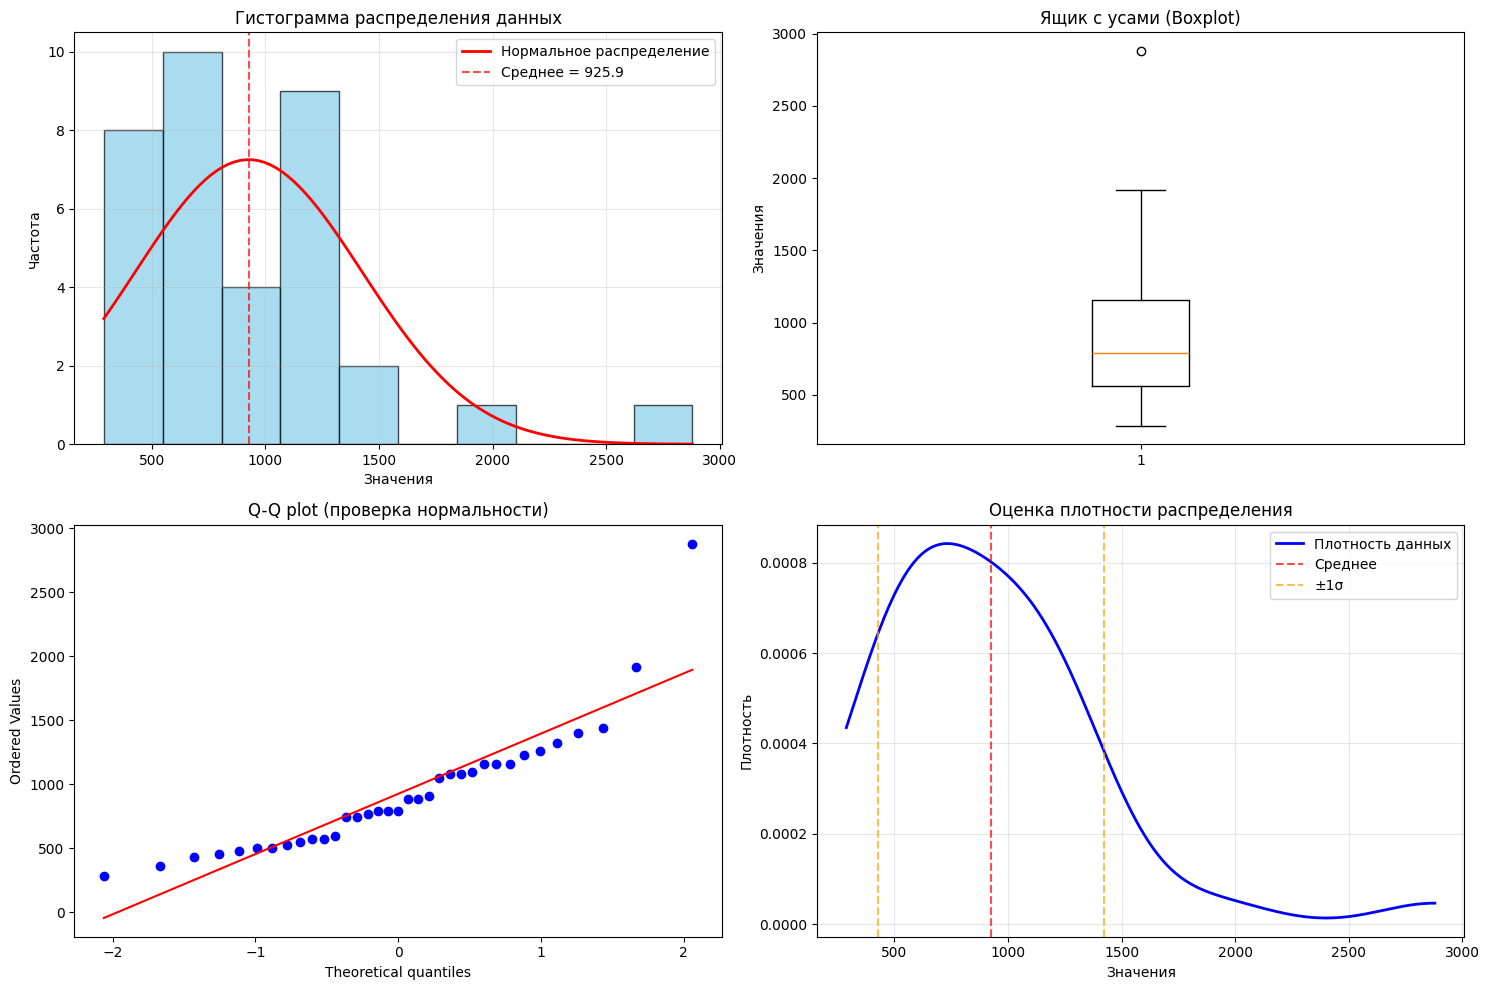

In [28]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def analyze_normal_distribution():
    # Данные
    data = np.array([888, 1320, 792, 456, 1160, 2880, 1048, 792, 1260, 1160,
                     288, 552, 576, 744, 576, 1440, 360, 1400, 528, 480,
                     1100, 1160, 912, 600, 744, 1080, 432, 1230, 768, 1080,
                     1920, 888, 792, 500, 502])
    
    # Основные статистики
    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)  # ddof=1 для несмещенной оценки
    cv = (std_val / mean_val) * 100
    skew_val = stats.skew(data)
    kurt_val = stats.kurtosis(data) + 3  # scipy возвращает эксцесс относительно нормального
    
    print('ОСНОВНЫЕ СТАТИСТИКИ:')
    print(f'Среднее значение: {mean_val:.2f}')
    print(f'Стандартное отклонение: {std_val:.2f}')
    print(f'Коэффициент вариации: {cv:.2f}%')
    print(f'Коэффициент асимметрии: {skew_val:.2f}')
    print(f'Коэффициент эксцесса: {kurt_val:.2f}')
    print()
    
    # Анализ интервалов ±1σ, ±2σ, ±3σ
    print('АНАЛИЗ ИНТЕРВАЛОВ:')
    
    intervals = [
        ('±1σ', 1, 68.27),
        ('±2σ', 2, 95.45),
        ('±3σ', 3, 99.73)
    ]
    
    for name, multiplier, expected_percent in intervals:
        lower_bound = mean_val - multiplier * std_val
        upper_bound = mean_val + multiplier * std_val
        
        values_in_interval = np.sum((data >= lower_bound) & (data <= upper_bound))
        actual_percent = (values_in_interval / len(data)) * 100
        
        print(f'{name}: {mean_val:.2f} ± {multiplier}×{std_val:.2f} = ({lower_bound:.2f}, {upper_bound:.2f})')
        print(f'Ожидаемое попадание: ~{expected_percent}%')
        print(f'Фактическое попадание: {actual_percent:.1f}% ({values_in_interval}/{len(data)} значений)')
        print()
    
    # Проверка на нормальность распределения (тест Шапиро-Уилка)
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print('ПРОВЕРКА НА НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ:')
    print(f'Тест Шапиро-Уилка: p-value = {shapiro_p:.6f}')
    
    if shapiro_p > 0.05:
        print('Распределение соответствует нормальному (p-value > 0.05)')
    else:
        print('Распределение не соответствует нормальному (p-value ≤ 0.05)')
    print()
    
    # Анализ коэффициентов
    print('АНАЛИЗ КОЭФФИЦИЕНТОВ:')
    print(f'Коэффициент вариации (V): {cv:.2f}% - ', end='')
    if cv > 100:
        print('Нестабильные данные, обилие выбросов')
    elif cv > 50:
        print('Высокая изменчивость')
    else:
        print('Умеренная изменчивость')
    
    print(f'Коэффициент асимметрии (Sk): {skew_val:.2f} - ', end='')
    if abs(skew_val) > 1:
        print('Значительное смещение')
    elif abs(skew_val) > 0.5:
        print('Умеренное смещение')
    else:
        print('Незначительное смещение')
    
    print(f'Коэффициент эксцесса (Ex): {kurt_val:.2f} - ', end='')
    if kurt_val > 4:
        print('Сильно выраженный пик, распределение далеко от нормального')
    elif kurt_val > 3:
        print('Умеренно выраженный пик')
    else:
        print('Близко к нормальному распределению')
    print()
    
    # Общий вывод
    print('ОБЩИЙ ВЫВОД ПО АНАЛИЗУ ДАННЫХ:')
    if (shapiro_p > 0.05 and 
        abs(skew_val) < 2 and 
        abs(kurt_val - 3) < 2):
        print('Распределение соответствует нормальному')
    else:
        print('Распределение имеет значительные отклонения от нормального')
    
    # Построение графиков
    plot_distribution(data, mean_val, std_val)

def plot_distribution(data, mean_val, std_val):
    plt.figure(figsize=(15, 10))
    
    # Гистограмма с нормальным распределением
    plt.subplot(2, 2, 1)
    n, bins, patches = plt.hist(data, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Добавляем кривую нормального распределения
    x = np.linspace(min(data), max(data), 100)
    y = stats.norm.pdf(x, mean_val, std_val) * len(data) * (bins[1] - bins[0])
    plt.plot(x, y, 'r-', linewidth=2, label='Нормальное распределение')
    
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Среднее = {mean_val:.1f}')
    plt.title('Гистограмма распределения данных')
    plt.xlabel('Значения')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Boxplot
    plt.subplot(2, 2, 2)
    plt.boxplot(data)
    plt.title('Ящик с усами (Boxplot)')
    plt.ylabel('Значения')
    
    # QQ-plot
    plt.subplot(2, 2, 3)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q plot (проверка нормальности)')
    
    # График плотности
    plt.subplot(2, 2, 4)
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(data)
    x_range = np.linspace(min(data), max(data), 1000)
    plt.plot(x_range, kde(x_range), 'b-', linewidth=2, label='Плотность данных')
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label='Среднее')
    plt.axvline(mean_val + std_val, color='orange', linestyle='--', alpha=0.7, label='±1σ')
    plt.axvline(mean_val - std_val, color='orange', linestyle='--', alpha=0.7)
    plt.title('Оценка плотности распределения')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


analyze_normal_distribution()